In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def true_func(X):
    return np.sin(X)

def generate_data(n_sample=25, noise=0.1):
    X = np.sort(np.random.rand(n_sample)*2*np.pi).reshape(-1,1)
    y = true_func(X).ravel() + np.random.normal(0, noise, size=n_sample)
    return X, y

In [25]:
X_train, y_train = generate_data()

In [26]:
X_train.shape, y_train.shape

((25, 1), (25,))

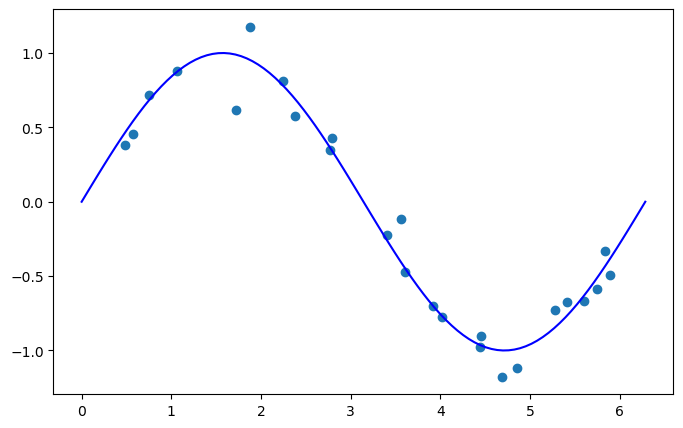

In [29]:
plt.figure(figsize = (8,5))
plt.scatter(X_train, y_train)
x_plot = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
plt.plot(x_plot, true_func(x_plot), label="True Function (sin(x))", color='blue')
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [37]:
n_runs = 100
degree = 3
X_test = np.linspace(0,2*np.pi, 100).reshape(-1,1)

In [39]:
all_prediction = []

for _ in range(n_runs):
    X_train, y_train = generate_data()
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    all_prediction.append(y_pred)

In [40]:
type(all_prediction)
#time to covert it back to np.array to get the better results

list

In [42]:
all_prediction = np.array(all_prediction)

In [49]:
avg_prediction = np.mean(all_prediction, axis=0)

In [51]:
y_true = true_func(X_test).ravel()
y_true.shape

(100,)

In [59]:
bias_squared = np.mean((avg_prediction - y_true)**2)

In [65]:
variance = np.mean(np.var(all_prediction, axis=0))

In [70]:
total_error = np.mean((all_prediction - y_true)**2)
noise = 0.01

In [71]:
print("Bias^2     =", round(bias_squared, 4))
print("Variance   =", round(variance, 4))
print("Noise      =", noise)
print("Total Error (Expected MSE) =", round(total_error, 4))
print("Bias^2 + Variance + Noise  =", round(bias_squared + variance + noise, 4))

Bias^2     = 0.0051
Variance   = 0.0045
Noise      = 0.01
Total Error (Expected MSE) = 0.0095
Bias^2 + Variance + Noise  = 0.0195


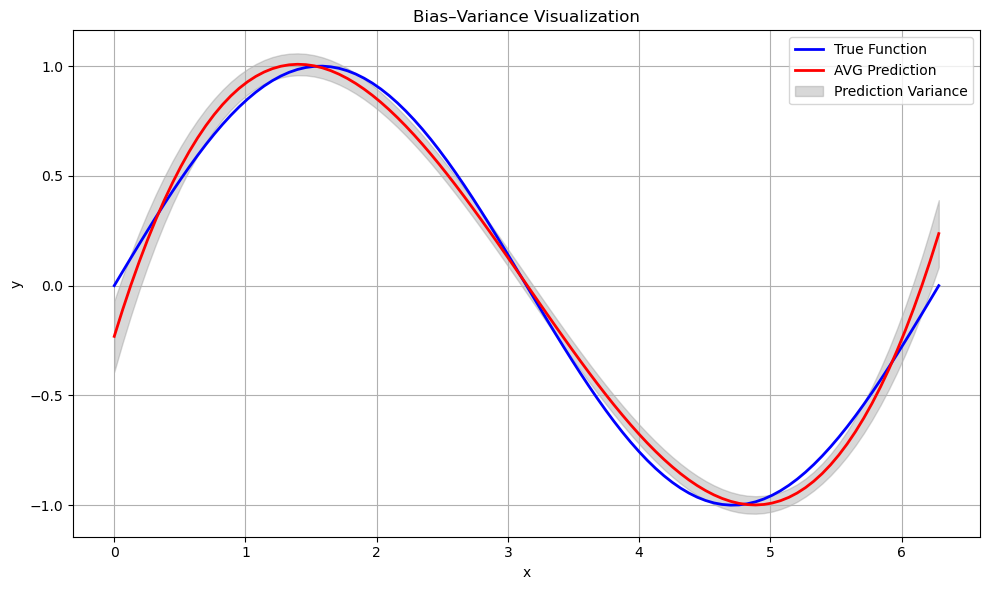

In [76]:
plt.figure(figsize=(10,6))
plt.plot(X_test, y_true, label='True Function', color='Blue', linewidth=2)
plt.plot(X_test, avg_prediction, label = 'AVG Prediction', color = 'red', linewidth=2)
std_dev = np.std(all_prediction, axis=0)
plt.fill_between(
    X_test.ravel(),
    avg_prediction - std_dev,
    avg_prediction + std_dev,
    color='gray',
    alpha=0.3,
    label='Prediction Variance'
)

# Decorations
plt.title("Bias–Variance Visualization")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## using Mlxtend library getting down to bias variance decomposition

In [79]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Create test/train data (same sin(x) function)
X, y = generate_data()
x_test = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
y_test = true_func(x_test).ravel()

# Evaluate bias/variance with mlxtend
model = RandomForestRegressor()
mse, bias_sq, var = bias_variance_decomp(
    model, X, y, x_test, y_test, 
    loss='mse',
    num_rounds=100,
    random_seed=42
)

print(f"MSE        : {round(mse, 4)}")
print(f"Bias^2     : {round(bias_sq, 4)}")
print(f"Variance   : {round(var, 4)}")

MSE        : 0.034
Bias^2     : 0.0143
Variance   : 0.0197
